In [2]:
!pip install praw
import praw
import pandas as pd
import datetime as dt
import os

# CONFIG
query = "Tesla"
subreddits = ["stocks", "investing", "wallstreetbets"]
post_limit = 500  # per subreddit
output_dir = "/Users/andre/Desktop/Sentiment"
os.makedirs(output_dir, exist_ok=True)

#YOUR REDDIT CREDENTIALS
reddit = praw.Reddit(
    client_id="*****",
    client_secret="****",
    user_agent="desktop:sentiment-dashboard:v1.0 (by /u/*****)"
)

#SCRAPING
all_posts = []

for sub in subreddits:
    print(f"🔎 Scraping r/{sub} for '{query}'...")
    for submission in reddit.subreddit(sub).search(query, sort="new", limit=post_limit):
        all_posts.append({
            "created_utc": submission.created_utc,
            "date": dt.datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d'),
            "title": submission.title,
            "subreddit": sub,
            "author": str(submission.author),
            "score": submission.score,
            "num_comments": submission.num_comments,
            "url": submission.url
        })

# SAVE TO CSV
df = pd.DataFrame(all_posts)
output_dir = "/content"
output_path = os.path.join(output_dir, f"{query.lower()}_live_posts.csv")
df.to_csv(output_path, index=False)
print(f" Saved {len(df)} posts to:\n{output_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 2.8 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔎 Scraping r/stocks for 'Tesla'...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔎 Scraping r/investing for 'Tesla'...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔎 Scraping r/wallstreetbets for 'Tesla'...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Saved 730 posts to:
/content/tesla_live_posts.csv


In [3]:
import datetime as dt

# Drop duplicate titles (same post text)
df_cleaned = df.drop_duplicates(subset='title')

# Convert 'date' column to datetime type
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Drop posts without a title or with null values in key fields
df_cleaned = df_cleaned.dropna(subset=['title', 'date', 'score', 'num_comments'])

# Reset index for a clean DataFrame
df_cleaned.reset_index(drop=True, inplace=True)


<ipython-input-3-03abf556ef0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])


In [4]:
df.head()

,created_utc,date,title,subreddit,author,score,num_comments,url
0,1.747060e+09,2025-05-12,Tesla quietly gets back to $1 Trillion market cap,stocks,likwitsnake,949,644,https://www.reddit.com/r/stocks/comments/1kkto...
1,1.746800e+09,2025-05-09,Why is tesla stocks rising so fast?,stocks,TheGodfather7100,774,811,https://www.reddit.com/r/stocks/comments/1kijo...
2,1.746795e+09,2025-05-09,Cathie Wood on CNBC this morning,stocks,Trey123RE,0,73,https://www.reddit.com/r/stocks/comments/1kihr...
3,1.746747e+09,2025-05-08,Thoughts on $HIMS,stocks,carpetmagicianlaughs,0,11,https://www.reddit.com/r/stocks/comments/1ki4j...
4,1.746738e+09,2025-05-08,Tesla’s ‘Robotaxi’ and ‘Cybercab’ trademarks h...,stocks,joe4942,175,38,https://www.reddit.com/r/stocks/comments/1ki0z...


In [5]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring to each post title
df['sentiment_score'] = df['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [7]:
from transformers import pipeline

finbert = pipeline("sentiment-analysis", model="ProsusAI/finbert")
result = finbert("Tesla is expected to outperform the market.")
print(result)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'positive', 'score': 0.9528599977493286}]


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Add sentiment score column
df['sentiment_score'] = df['title'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Add binary label: 1 = positive or neutral, 0 = negative
# You can change the threshold depending on how strict you want it
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 1 if x >= 0 else 0)

In [9]:
# Make sure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by date and calculate average sentiment score per day
daily_sentiment = df.groupby(df['date'].dt.date)['sentiment_score'].mean().reset_index()

# Sort by highest average sentiment
top_sentiment_days = daily_sentiment.sort_values(by='sentiment_score', ascending=False).head(10)
print(top_sentiment_days)

           date  sentiment_score
83   2024-06-02           0.7783
36   2023-10-14           0.6908
114  2024-11-23           0.6667
67   2024-03-01           0.6369
109  2024-11-01           0.6249
45   2023-12-29           0.5994
54   2024-01-20           0.5994
158  2025-01-31           0.5423
94   2024-07-02           0.5267
82   2024-05-25           0.5204


In [10]:
import requests
import pandas as pd

#Scraping TSLA stock

api_key = '*****'
symbol = 'TSLA'
function = 'TIME_SERIES_DAILY'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

if 'Time Series (Daily)' in data:
    stock_df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    stock_df = stock_df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    })
    stock_df.index = pd.to_datetime(stock_df.index)
    stock_df = stock_df.sort_index()
    stock_df = stock_df.astype(float)
    stock_df.reset_index(inplace=True)
    stock_df.rename(columns={'index': 'Date'}, inplace=True)
else:
    print("Error fetching data.")

In [11]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['date'] = stock_df['Date'].dt.date

In [12]:
# daily_sentiment from earlier
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date']).dt.date

In [13]:
merged_df = pd.merge(stock_df, daily_sentiment, on='date', how='inner')

In [14]:
correlation = merged_df[['Close', 'sentiment_score']].corr().iloc[0, 1]
print(f" Correlation: {correlation:.2f}")

 Correlation: 0.12


In [16]:
# Shift closing price by -1 to align yesterday’s sentiment with tomorrow’s price
merged_df['Next_Close'] = merged_df['Close'].shift(-1)

# Drop rows with missing values after shift
merged_lagged = merged_df.dropna()

# Correlation with next day's price
lagged_corr = merged_lagged[['Next_Close', 'sentiment_score']].corr().iloc[0, 1]
print(f"Correlation (Sentiment to Next Day Price): {lagged_corr:.2f}")

Correlation (Sentiment to Next Day Price): 0.15


In [17]:
merged_lagged['Price_Change'] = merged_lagged['Next_Close'] > merged_lagged['Close']
merged_lagged['Price_Label'] = merged_lagged['Price_Change'].astype(int)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = merged_lagged[['sentiment_score']]
y = merged_lagged['Price_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

<ipython-input-17-706b30aecc08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_lagged['Price_Change'] = merged_lagged['Next_Close'] > merged_lagged['Close']
<ipython-input-17-706b30aecc08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_lagged['Price_Label'] = merged_lagged['Price_Change'].astype(int)


              precision    recall  f1-score   support

           0       0.48      0.63      0.55        19
           1       0.42      0.28      0.33        18

    accuracy                           0.46        37
   macro avg       0.45      0.45      0.44        37
weighted avg       0.45      0.46      0.44        37



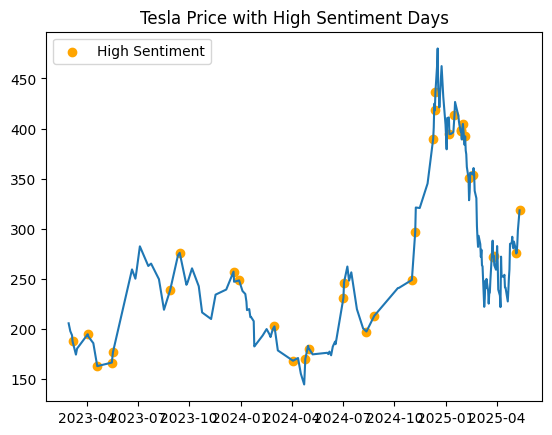

In [18]:
import matplotlib.pyplot as plt

high_sentiment = merged_df[merged_df['sentiment_score'] > 0.25]
plt.plot(merged_df['date'], merged_df['Close'])
plt.scatter(high_sentiment['date'], high_sentiment['Close'], color='orange', label='High Sentiment')
plt.legend()
plt.title("Tesla Price with High Sentiment Days")
plt.show()

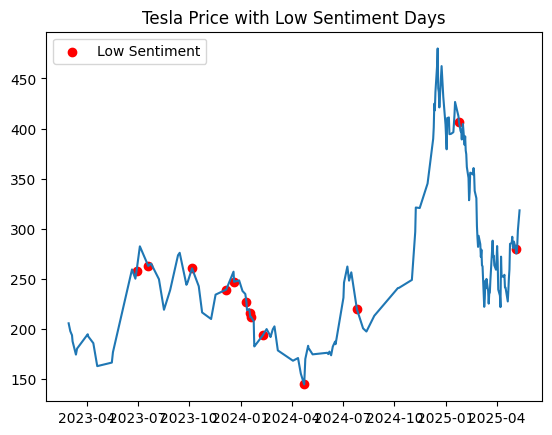

In [19]:
import matplotlib.pyplot as plt

high_sentiment = merged_df[merged_df['sentiment_score'] < -0.25]
plt.plot(merged_df['date'], merged_df['Close'])
plt.scatter(high_sentiment['date'], high_sentiment['Close'], color='red', label='Low Sentiment')
plt.legend()
plt.title("Tesla Price with Low Sentiment Days")
plt.show()